# Applied Data Science Capstone Project : 
### Battle for the Restaurants.


### 1. Introduction to the problem :

In this article, we’ll explore venues in Pune, India based on their rating and average prices. Whenever a person is visiting a city they start looking for venues to visit during their stay. Thus, our aim here is to identify places that someone can visit.
In this problem we will talk about which places a client can start a hotel or a restaurant and which cuisine he/she should persue in the process.

We will also be able to display where exactly restaurants are located and by using population data we maybe able to see which areas show higher density of people so that the restaurant will have maximum food enthusiasts.

### 2. Data Utilized :

The data has been collected from API, Foursquare API . The first step was to search for venues within a radius of 4 Kilometers from Pune’s center point. After extracting over 100 locations using the Foursquare API, and the based on each cuisine we find the data required for the project.
The population data will be available through kaggle which provides many datasets for projects.
 

## 3. Analysis :

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda

In [3]:
CLIENT_ID = '3YKX4FGPPKCE410LKNZBFPNLXENNJJABG1CD0SMGO5VP5TA0'
CLIENT_SECRET = '4XNX1BG01ZDK3OUFOXF4Y2TYGECQDN1VV4DLPAT3LG4UPKBU' 
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3YKX4FGPPKCE410LKNZBFPNLXENNJJABG1CD0SMGO5VP5TA0
CLIENT_SECRET:4XNX1BG01ZDK3OUFOXF4Y2TYGECQDN1VV4DLPAT3LG4UPKBU


In [4]:
address = 'Paud Phata,Pune'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

18.5061568 73.8256238


In [5]:
search_query = 'chinese'
radius = 40000

In [6]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3YKX4FGPPKCE410LKNZBFPNLXENNJJABG1CD0SMGO5VP5TA0&client_secret=4XNX1BG01ZDK3OUFOXF4Y2TYGECQDN1VV4DLPAT3LG4UPKBU&ll=18.5061568,73.8256238&v=20180604&query=chinese&radius=40000&limit=100'

In [7]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ec681e59c6f59001b9ec41d'},
 'response': {'venues': [{'id': '4cd6c3ad122ba143369034a1',
    'name': 'Chinese Room Oriental',
    'location': {'address': '# 17A 4/5, Continental Chambers, Karve Road, Erandwane',
     'crossStreet': 'Karve Road',
     'lat': 18.5104821947705,
     'lng': 73.83478848816188,
     'labeledLatLngs': [{'label': 'display',
       'lat': 18.5104821947705,
       'lng': 73.83478848816188}],
     'distance': 1080,
     'postalCode': '411029',
     'cc': 'IN',
     'city': 'Pune',
     'state': 'Mahārāshtra',
     'country': 'India',
     'formattedAddress': ['# 17A 4/5, Continental Chambers, Karve Road, Erandwane (Karve Road)',
      'Pune 411029',
      'Mahārāshtra',
      'India']},
    'categories': [{'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'shortName': 'Chinese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
   

In [8]:
venues = results['response']['venues']


chinese_df = pd.json_normalize(venues)
chinese_df.head()

id                     name  \
0  4cd6c3ad122ba143369034a1    Chinese Room Oriental   
1  4bb4d5eb6444b713c5b6f300       Sudit Su's Chinese   
2  4dcc0b1bd16478749fb0c1f6             Real chinese   
3  50a65dd9e4b04d06255cba12  mudra chinese fast food   
4  5029133ee4b0e6861fe84ed0            chinese tapri   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d145941735', 'name': 'C...  v-1590067855    False   
1  [{'id': '4bf58dd8d48988d145941735', 'name': 'C...  v-1590067855    False   
2  [{'id': '4bf58dd8d48988d145941735', 'name': 'C...  v-1590067855    False   
3  [{'id': '4bf58dd8d48988d145941735', 'name': 'C...  v-1590067855    False   
4  [{'id': '4bf58dd8d48988d147941735', 'name': 'D...  v-1590067855    False   

                                    location.address   location.crossStreet  \
0  # 17A 4/5, Continental Chambers, Karve Road, E...             Karve Road   
1                        Dahanukar Colony, Lane No 3                Kothrud   
2                                            kothrud             karve road   
3                                                NaN                    NaN   
4                                 Paud Road Footpath  Opposite Food Parlour   

   location.lat  location.lng  \
0     18.510482     73.834788   
1     18.495267     73.812488   
2     18.504267     73.825092   
3     18.509249     73.822380   
4     18.498344     73.821249   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 18.5104821947705,...               1080   
1  [{'label': 'display', 'lat': 18.49526732391395...               1841   
2  [{'label': 'display', 'lat': 18.50426746921154...                217   
3  [{'label': 'display', 'lat': 18.50924873352050...                485   
4  [{'label': 'display', 'lat': 18.49834387605008...                984   

  location.postalCode location.cc location.city location.state  \
0              411029          IN          Pune    Mahārāshtra   
1              411029          IN          Pune    Mahārāshtra   
2                 NaN          IN          Pune    Mahārāshtra   
3                 NaN          IN           NaN            NaN   
4                 NaN          IN          Pune    Mahārāshtra   

  location.country                          location.formattedAddress  
0            India  [# 17A 4/5, Continental Chambers, Karve Road, ...  
1            India  [Dahanukar Colony, Lane No 3 (Kothrud), Pune 4...  
2            India   [kothrud (karve road), Pune, Mahārāshtra, India]  
3            India                                            [India]  
4            India  [Paud Road Footpath (Opposite Food Parlour), P...

In [9]:
search_query = 'Italian'
radius = 40000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url
results = requests.get(url).json()
results
venues = results['response']['venues']


Italian_df = pd.json_normalize(venues)
Italian_df.head()

filtered_columns = ['name', 'categories'] + [col for col in Italian_df.columns if col.startswith('location.')] + ['id']
dataframe_fItalian = Italian_df .loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_fItalian['categories'] = dataframe_fItalian.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_fItalian.columns = [column.split('.')[-1] for column in dataframe_fItalian.columns]

dataframe_fItalian

name          categories  \
0              Cibo The Italian House  Italian Restaurant   
1      La Basilica Italian Restaurant  Italian Restaurant   
2             The Italian Job - PIZZA  Italian Restaurant   
3                  New Italian BAKERY              Bakery   
4                     Gelato Italiano      Ice Cream Shop   
5               Viviana italian joint  Italian Restaurant   
6          Toscana Italian Restaurant  Italian Restaurant   
7                   Da Milano Italian   Accessories Store   
8                    La Italian slice  Italian Restaurant   
9                     Gelato Italiano        Dessert Shop   
10                    Gelato Italiano      Ice Cream Shop   
11  Gelato italiano,baner p link road        Dessert Shop   
12             Squisito Café Italiano  Italian Restaurant   
13                    Gelato Italiano        Dessert Shop   
14                    Gelato Italiano  Frozen Yogurt Shop   
15                    Gelato Italiano      Ice Cream Shop   
16                    Bong - Italiano                None   
17                      Bong Italiano                None   
18                    Gelato Italiano      Ice Cream Shop   
19                    Gelato Italiano      Ice Cream Shop   

                                address                       crossStreet  \
0           15/A, Saraswati Apartment's                  Laxmibagh Colony   
1        The Oakwood, Good Luck Square,  Bhandarkar Road, Deccan Gymkhana   
2                        E-Square,132/A                   University Road   
3                                   NaN                               NaN   
4                               kothrud                        karve road   
5                                   NaN                               NaN   
6                           East Avenue                     Kalyani Nagar   
7                                   NaN                               NaN   
8                                   NaN                               NaN   
9                                   NaN                               NaN   
10       Food Court, Kumar Pacific Mall                 Shankar Seth Road   
11                                  NaN                               NaN   
12                          Axis centra          Pashan Highway side road   
13                        Koregaon Park                               NaN   
14     Nitesh Hub, Koregaon Plaza, Pune                               NaN   
15      Food Court, Phoenix Market City                          Nagar Rd   
16  Destination Center, Magarpatta City                               NaN   
17                                  NaN                               NaN   
18                                  NaN                               NaN   
19                  Phoenix Market City                       Viman Nagar   

          lat        lng                                     labeledLatLngs  \
0   18.508768  73.835350  [{'label': 'display', 'lat': 18.508768, 'lng':...   
1   18.517691  73.841149  [{'label': 'display', 'lat': 18.517691, 'lng':...   
2   18.537672  73.835155  [{'label': 'display', 'lat': 18.53767192568952...   
3   18.513215  73.860172  [{'label': 'display', 'lat': 18.51321469278132...   
4   18.503246  73.819492  [{'label': 'display', 'lat': 18.50324558129647...   
5   18.509731  73.927986  [{'label': 'display', 'lat': 18.50973129272461...   
6   18.553978  73.905509  [{'label': 'display', 'lat': 18.55397832387047...   
7   18.565220  73.916081  [{'label': 'display', 'lat': 18.56521988094710...   
8   18.566868  73.914193  [{'label': 'display', 'lat': 18.56686753822382...   
9   18.537672  73.835155  [{'label': 'display', 'lat': 18.53767192568952...   
10  18.501470  73.872542  [{'label': 'display', 'lat': 18.50146986584515...   
11  18.548364  73.794217  [{'label': 'display', 'lat': 18.54836385444305...   
12  18.557472  73.770650  [{'label': 'display', 'lat': 18.557472, 'lng':...   
13  18.538604  73.900122  [

In [10]:
search_query = 'Multi-Cuisine RestauarNT'
radius = 40000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url
results = requests.get(url).json()
results
venues = results['response']['venues']


cont_df = pd.json_normalize(venues)
cont_df.head()

filtered_columns = ['name', 'categories'] + [col for col in cont_df.columns if col.startswith('location.')] + ['id']
dataframe_fcont = cont_df .loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_fcont['categories'] = dataframe_fcont.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_fcont.columns = [column.split('.')[-1] for column in dataframe_fcont.columns]

dataframe_fcont

name          categories        lat  \
0            Nimbalkar's Multi Cuisine Hangout  Chinese Restaurant  18.500038   
1               Zaika Multi-cuisine Restaurant   Indian Restaurant  18.566907   
2               Theos Multi-Cuisine Restaurant    Theme Restaurant  18.560960   
3            Bristo's Multi Cuisine Restaurant                None  18.566761   
4  Amara - Multi-Cuisine Restaurant, Open 24X7          Restaurant  18.529955   
5              Orchid Multi Cuisine Restaurant               Diner  18.591401   
6            Linx-The Multi Cuisine Restaurant               Diner  18.545931   
7                 Aakash Hotel & Multi Cuisine    Asian Restaurant  18.589151   

         lng                                     labeledLatLngs  distance  cc  \
0  73.822345  [{'label': 'display', 'lat': 18.500038, 'lng':...       764  IN   
1  73.839055  [{'label': 'display', 'lat': 18.56690732252704...      6909  IN   
2  73.792400  [{'label': 'display', 'lat': 18.56096, 'lng': ...      7036  IN   
3  73.912142  [{'label': 'display', 'lat': 18.566761, 'lng':...     11353  IN   
4  73.912100  [{'label': 'display', 'lat': 18.529955, 'lng':...      9504  IN   
5  73.748112  [{'label': 'display', 'lat': 18.591401, 'lng':...     12528  IN   
6  73.936829  [{'label': 'display', 'lat': 18.54593136442557...     12545  IN   
7  73.958159  [{'label': 'display', 'lat': 18.58915110735293...     16763  IN   

  country                                   formattedAddress  \
0   India                                            [India]   
1   India         [Opp. Kirloskar, Pune, Mahārāshtra, India]   
2   India  [Quadra, No.4, Behind Kapil Malhar,, Baner roa...   
3   India  [Sky Max Mall (Vimanagar), Pune, Mahārāshtra, ...   
4   India  [Magnus Star Residency Hotel (Near Passport Of...   
5   India  [ITC Fortune Inn Exotica (Rajiv Gandhi IT Park...   
6   India  [Premier Inn,Kharadi (Kharadi-Mundhwa Bypass R...   
7   India                                            [India]   

                                             address  city        state  \
0                                                NaN   NaN          NaN   
1                                     Opp. Kirloskar  Pune  Mahārāshtra   
2  Quadra, No.4, Behind Kapil Malhar,, Baner road...  Pune  Mahārāshtra   
3                                       Sky Max Mall  Pune  Mahārāshtra   
4                        Magnus Star Residency Hotel  Pune  Mahārāshtra   
5                            ITC Fortune Inn Exotica  Pune  Mahārāshtra   
6                                Premier Inn,Kharadi  Pune  Mahārāshtra   
7                                                NaN   NaN          NaN   

                      crossStreet postalCode                        id  
0                             NaN        NaN  504cb586e4b09a4432066349  
1                             NaN        NaN  4bb61b591344b713bef99c04  
2                             NaN        NaN  57c295e6498e902a3dd21ef2  
3                       Vimanagar        NaN  4f4a4854e4b07165fb0def5b  
4   Near Passport Office, Mundhwa     411036  5c5b0860c0f163002c43dc54  
5  Rajiv Gandhi IT Park;Hinjewadi     411057  568bb2e4498e8191483a62e9  
6     Kharadi-Mundhwa Bypass Road     411014  55305a4a498e3c3da0154190  
7                             NaN        NaN  52f4f140498ee2e633d064a7

In [11]:
filtered_columns = ['name', 'categories'] + [col for col in chinese_df.columns if col.startswith('location.')] + ['id']
dataframe_filtered = chinese_df .loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

name                       categories  \
0                 Chinese Room Oriental               Chinese Restaurant   
1                    Sudit Su's Chinese               Chinese Restaurant   
2                          Real chinese               Chinese Restaurant   
3               mudra chinese fast food               Chinese Restaurant   
4                         chinese tapri                            Diner   
5               Hotel Moonlight Chinese               Chinese Restaurant   
6                        Chinese Garden                           Garden   
7                        Chinese Garden               Chinese Restaurant   
8                        Pathan Chinese                 Asian Restaurant   
9           Chinese Hut And Coffee Shop                           Bakery   
10                       Chinese Dragon              Szechuan Restaurant   
11                     Chinese fastfood               Chinese Restaurant   
12                     Friend's Chinese             Fast Food Restaurant   
13           Kimling Chinese Restaurant               Chinese Restaurant   
14                      Beijing Chinese               Chinese Restaurant   
15                        Durga Chinese               Chinese Restaurant   
16        Shaolin - The Chinese Cuisine               Chinese Restaurant   
17         China Hut. Authentic chinese               Chinese Restaurant   
18                     Whats up Chinese               Chinese Restaurant   
19                        Chinese stall               Chinese Restaurant   
20                 Gauri Chinese Center               Chinese Restaurant   
21                        Gokul Chinese               Chinese Restaurant   
22                  Dragon Chinese Food                       Food Truck   
23                         chinese room               Chinese Restaurant   
24                        chinese katta               Chinese Restaurant   
25                        Chinese Katta               Chinese Restaurant   
26                    Zen Chinese Rest.                             None   
27                     Himalaya Chinese               Chinese Restaurant   
28                    Gandharva Chinese               Chinese Restaurant   
29                Chopstix Indo Chinese               Chinese Restaurant   
30         Hong-Kong Chinese Restaurant        Indian Chinese Restaurant   
31                         Chinese Room               Chinese Restaurant   
32                       Buwa's Chinese               Chinese Restaurant   
33                  Real chinese corner             Fast Food Restaurant   
34        The Village Chinese & punjabi               Chinese Restaurant   
35                     Samruddi Chinese               Chinese Restaurant   
36             Aling chinese restaurant               Chinese Restaurant   
37                          A-1 Chinese               Chinese Restaurant   
38                         Raje Chinese  Molecular Gastronomy Restaurant   
39                       Chinese In Box               Chinese Restaurant   
40          Chung-Fa Chinese Restaurant               Chinese Restaurant   
41                 Shree Chinese Corner               Chinese Restaurant   
42                    Someshwar Chinese               Chinese Restaurant   
43           Darjeeling Momos & Chinese               Dim Sum Restaurant   
44                     East End Chinese               Chinese Restaurant   
45                      The Chinese Wok                       Food Court   
46  Samruddhi Chinese And Biryani House              Japanese Restaurant   
47                   Chopsticks Chinese               Chinese Restaurant   
48                         S.K. Chinese               Chinese Restaurant   
49                       chinese corner               Chinese Restaurant   

                                              address  \
0   # 17A 4/5, Continental Chambers, Karve Road, E...   
1                         Dahanukar Colony, 

In [12]:
dataframe_filtered.name

0                   Chinese Room Oriental
1                      Sudit Su's Chinese
2                            Real chinese
3                 mudra chinese fast food
4                           chinese tapri
5                 Hotel Moonlight Chinese
6                          Chinese Garden
7                          Chinese Garden
8                          Pathan Chinese
9             Chinese Hut And Coffee Shop
10                         Chinese Dragon
11                       Chinese fastfood
12                       Friend's Chinese
13             Kimling Chinese Restaurant
14                        Beijing Chinese
15                          Durga Chinese
16          Shaolin - The Chinese Cuisine
17           China Hut. Authentic chinese
18                       Whats up Chinese
19                          Chinese stall
20                   Gauri Chinese Center
21                          Gokul Chinese
22                    Dragon Chinese Food
23                           chine

In [13]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12,tiles='OpenStreetMap') 


folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Pune',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)


for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
       
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_fItalian.lng, dataframe_fItalian.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
       
        fill = True,
        fill_color='purple',
        fill_opacity=0.6
    ).add_to(venues_map)

    
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_fcont.lng, dataframe_fcont.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
       
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    

venues_map

## Based on the above map we can see that the Restaurants with Chinese,Italian Cuisines and some Multi-cuisine style are particularly spread out throughout Pune , it can be seen that it is mostly concentrated in the centre of Pune which include the areas of Erandwane,Kothrud,Deccan Gymkhanna and to some extent Pune Cantonment. 

In [14]:
df=pd.read_csv('zomato_restaurants_in_India.csv')
df.head()

res_id                            name      establishment  \
0  3400299                     Bikanervala    ['Quick Bites']   
1  3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2  3401013                   Bhagat Halwai    ['Quick Bites']   
3  3400290                   Bhagat Halwai    ['Quick Bites']   
4  3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   

                                                 url  \
0  https://www.zomato.com/agra/bikanervala-khanda...   
1  https://www.zomato.com/agra/mama-chicken-mama-...   
2  https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3  https://www.zomato.com/agra/bhagat-halwai-civi...   
4  https://www.zomato.com/agra/the-salt-cafe-kitc...   

                                             address  city  city_id  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra       34   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra       34   
2  62/1, Near Easy Day, West Shivaji Nagar, Goalp...  Agra       34   
3  Near Anjana Cinema, Nehru Nagar, Civil Lines, ...  Agra       34   
4        1C,3rd Floor, Fatehabad Road, Tajganj, Agra  Agra       34   

      locality   latitude  longitude  ... price_range  currency  \
0     Khandari  27.211450  78.002381  ...           2       Rs.   
1   Agra Cantt  27.160569  78.011583  ...           2       Rs.   
2     Shahganj  27.182938  77.979684  ...           1       Rs.   
3  Civil Lines  27.205668  78.004799  ...           1       Rs.   
4      Tajganj  27.157709  78.052421  ...           3       Rs.   

                                          highlights aggregate_rating  \
0  ['Lunch', 'Takeaway Available', 'Credit Card',...              4.4   
1  ['Delivery', 'No Alcohol Available', 'Dinner',...              4.4   
2  ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.2   
3  ['Takeaway Available', 'Credit Card', 'Lunch',...              4.3   
4  ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...              4.9   

  rating_text  votes  photo_count opentable_support delivery  takeaway  
0   Very Good    814          154               0.0       -1        -1  
1   Very Good   1203          161               0.0       -1        -1  
2   Very Good    801          107               0.0        1        -1  
3   Very Good    693          157               0.0        1        -1  
4   Excellent    470          291               0.0        1        -1  

[5 rows x 26 columns]

In [15]:
df=df.loc[df['city'] == 'Pune']
df.head(2)

res_id                    name    establishment  \
164447   11283  Harajuku - The O Hotel  ['Fine Dining']   
164448   10663     Mix@36 - The Westin       ['Lounge']   

                                                      url  \
164447  https://www.zomato.com/pune/harajuku-the-o-hot...   
164448  https://www.zomato.com/pune/mix@36-the-westin-...   

                                                  address  city  city_id  \
164447  The O Hotel, North Main Road, Koregaon Park, Pune  Pune        5   
164448  The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...  Pune        5   

                          locality   latitude  longitude  ... price_range  \
164447  The O Hotel, Koregaon Park  18.540239  73.887518  ...           4   
164448         The Westin, Mundhwa  18.540040  73.905910  ...           4   

        currency                                         highlights  \
164447       Rs.  ['Cash', 'Debit Card', 'Lunch', 'Credit Card',...   
164448       Rs.  ['Cash', 'Debit Card', 'Serves Alcohol', 'Take...   

       aggregate_rating rating_text  votes  photo_count opentable_support  \
164447              3.7        Good     96           38               0.0   
164448              4.0   Very Good    682           78               0.0   

       delivery  takeaway  
164447       -1        -1  
164448       -1        -1  

[2 rows x 26 columns]

In [16]:
address = 'Paud Phata,Pune'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

18.5061568 73.8256238


In [17]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12,tiles='OpenStreetMap') 


folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Pune',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)


for lat, lng, label in zip(df.latitude, df.longitude, df.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup='list',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    

venues_map

In [18]:
df_rat=pd.concat([df['delivery'],df['aggregate_rating'],df['price_range'],df['votes'],df['takeaway']],axis=1)
df_rat

delivery  aggregate_rating  price_range  votes  takeaway
164447        -1               3.7            4     96        -1
164448        -1               4.0            4    682        -1
164449        -1               4.0            4    310        -1
164450        -1               3.3            4      9        -1
164451        -1               4.4            4    500        -1
...          ...               ...          ...    ...       ...
168659        -1               4.3            3    474        -1
168660        -1               3.9            3    336        -1
168661        -1               4.3            2    143        -1
168662        -1               4.3            2    317        -1
168663        -1               3.9            3     67        -1

[4217 rows x 5 columns]

In [19]:
import seaborn as sns

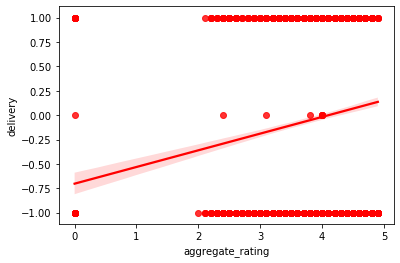

In [20]:
ax = sns.regplot(x='aggregate_rating', y='delivery', data=df_rat, color='red')


### Based on this scatter plot we can see that there is not much correlation between delib=very and Aggregate Rating i.e Restaurants not  having Delivery options also have good ratings.

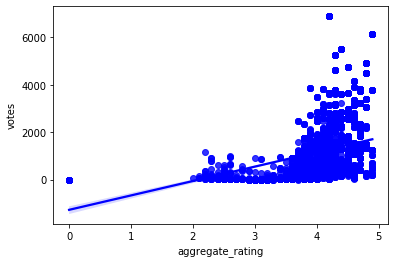

In [21]:
ax1= sns.regplot(x='aggregate_rating',y='votes',data=df_rat,color='blue')

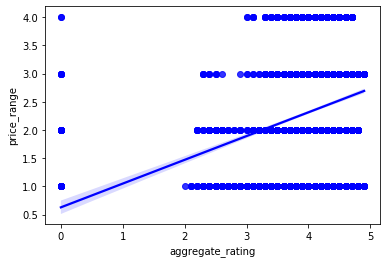

In [88]:
ax2= sns.regplot(x='aggregate_rating',y='price_range',data=df_rat,color='blue')

In [23]:
df_hist=pd.concat([df['name'],df['aggregate_rating']],axis=1)
df_hist
df_hist.set_index('name')

aggregate_rating
name                                                     
Harajuku - The O Hotel                                3.7
Mix@36 - The Westin                                   4.0
Kangan - The Westin                                   4.0
Palette - The Westin                                  3.3
Coriander Kitchen - Conrad Pune                       4.4
...                                                   ...
Lonavla Restaurant & Bar- Hotel Lonavla               4.3
Utopia                                                3.9
Mapro Garden                                          4.3
Hotel Chandralok                                      4.3
Lion's Dhaaba                                         3.9

[4217 rows x 1 columns]

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

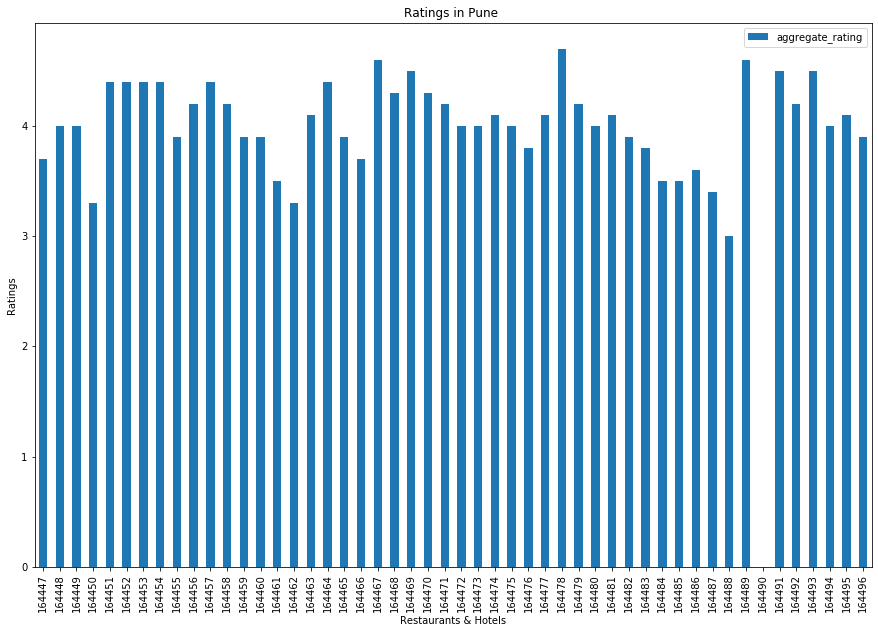

In [89]:
hist=df_hist.head(50).plot(kind='bar', figsize=(15, 10))

plt.xlabel('Restaurants & Hotels') # add to x-label to the plot
plt.ylabel('Ratings') # add y-label to the plot
plt.title('Ratings in Pune ') # add title to the plot

plt.show()

In [26]:
df_kothrud=df.loc[df['locality']=='Kothrud']
df_kothrud.head()

res_id                        name      establishment  \
164550  18602042  New Shegaon Kachori Centre    ['Quick Bites']   
164602   6507838              Medhekar Misal    ['Quick Bites']   
164624  18755785         Tirangi Rassa Misal    ['Quick Bites']   
164678  18763512                    BarBerry            ['Bar']   
164687  18569092                   Barometer  ['Casual Dining']   

                                                      url  \
164550  https://www.zomato.com/pune/new-shegaon-kachor...   
164602  https://www.zomato.com/pune/medhekar-misal-kot...   
164624  https://www.zomato.com/pune/tirangi-rassa-misa...   
164678  https://www.zomato.com/pune/barberry-kothrud?u...   
164687  https://www.zomato.com/pune/barometer-kothrud?...   

                                                  address  city  city_id  \
164550  A-2 Building, Shop 12, Sakhai Plaza, Opposite ...  Pune        5   
164602  Shop 3, Shrividya Apartments, Yamaha Showroom ...  Pune        5   
164624  Shop 1, Adwait Society, Near Bedekar Ganpati, ...  Pune        5   
164678  121/122, Rambaug Colony, Paud Road, Next Lane ...  Pune        5   
164687  Shop 2, Chintamani Pride, City Pride Road, Pas...  Pune        5   

       locality   latitude  longitude  ... price_range  currency  \
164550  Kothrud  18.501972  73.809506  ...           1       Rs.   
164602  Kothrud  18.509905  73.803506  ...           1       Rs.   
164624  Kothrud  18.512435  73.817607  ...           1       Rs.   
164678  Kothrud  18.511180  73.817176  ...           3       Rs.   
164687  Kothrud  18.498802  73.819271  ...           3       Rs.   

                                               highlights aggregate_rating  \
164550  ['Takeaway Available', 'No Alcohol Available',...              3.3   
164602  ['Lunch', 'Takeaway Available', 'Breakfast', '...              3.8   
164624  ['Delivery', 'Breakfast', 'Lunch', 'Takeaway A...              3.6   
164678  ['Lunch', 'Cash', 'Credit Card', 'Dinner', 'Ta...              4.7   
164687  ['Dinner', 'Cash', 'Takeaway Available', 'Brea...              4.6   

       rating_text  votes  photo_count opentable_support delivery  takeaway  
164550     Average      9            3               0.0       -1        -1  
164602        Good     45           41               0.0       -1        -1  
164624        Good     32           20               0.0       -1        -1  
164678   Excellent   1410          194               0.0       -1        -1  
164687   Excellent   1397         1421               0.0        1        -1  

[5 rows x 26 columns]

In [90]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=14,tiles='OpenStreetMap') 


folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Pune',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)


for lat, lng, label in zip(df_kothrud.latitude, df_kothrud.longitude, df_kothrud.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map

In [36]:
df_high=df['locality'].value_counts()
df_high.head(50)

Baner                                    315
Koregaon Park                            291
Viman Nagar                              197
Kothrud                                  187
Hinjawadi                                154
Phoenix Market City, Viman Nagar         142
Kalyani Nagar                            142
FC Road                                  140
Wakad                                    108
Aundh                                     98
Kharadi                                   92
Mundhwa                                   87
Pimple Saudagar                           82
Deccan Gymkhana                           80
Shivaji Nagar                             62
Lonavala                                  61
White Square, Hinjawadi                   58
Ravet                                     57
Senapati Bapat Road                       56
Seasons Mall, Magarpatta                  54
Balewadi High Street, Balewadi            53
Erandwane                                 53
JM Road   

In [39]:
df_hrate=df[df['aggregate_rating']>4.0]
df_hrate

res_id                                     name      establishment  \
164451  18310167          Coriander Kitchen - Conrad Pune    ['Fine Dining']   
164452     11264                    Baan Tao - Hyatt Pune    ['Fine Dining']   
164453     11162             Alto Vino - JW Marriott Pune    ['Fine Dining']   
164454   6505646                   Feast - Sheraton Grand    ['Fine Dining']   
164456  18310169                       Koji - Conrad Pune    ['Fine Dining']   
...          ...                                      ...                ...   
168655     13345                                  Cafe 24    ['Fine Dining']   
168657   6508050                              Parsi Dhaba  ['Casual Dining']   
168659     13061  Lonavla Restaurant & Bar- Hotel Lonavla  ['Casual Dining']   
168661  18767059                             Mapro Garden  ['Casual Dining']   
168662   6503906                         Hotel Chandralok  ['Casual Dining']   

                                                      url  \
164451  https://www.zomato.com/pune/coriander-kitchen-...   
164452  https://www.zomato.com/pune/baan-tao-hyatt-pun...   
164453  https://www.zomato.com/pune/alto-vino-jw-marri...   
164454  https://www.zomato.com/pune/feast-sheraton-gra...   
164456  https://www.zomato.com/pune/koji-conrad-pune-b...   
...                                                   ...   
168655  https://www.zomato.com/pune/cafe-24-lonavala?u...   
168657  https://www.zomato.com/pune/parsi-dhaba-lonava...   
168659  https://www.zomato.com/pune/lonavla-restaurant...   
168661  https://www.zomato.com/pune/mapro-garden-lonav...   
168662  https://www.zomato.com/pune/hotel-chandralok-l...   

                                                  address  city  city_id  \
164451     Conrad, Mangaldas Road, Bund Garden Road, Pune  Pune        5   
164452  Hyatt Pune, Adjacent to Aga Khan Palace, Nagar...  Pune        5   
164453             JW Marriott, Senapati Bapat Road, Pune  Pune        5   
164454  Sheraton Grand, Raja Bahadur Mill Road, Bund G...  Pune        5   
164456     Conrad, Mangaldas Road, Bund Garden Road, Pune  Pune        5   
...                                                   ...   ...      ...   
168655  Della Adventure & Resorts, Kunegaon, Lonavala,...  Pune        5   
168657                Della Adventure & Resorts, Kunegaon  Pune        5   
168659     Gawlinaka, Mumbai-Pune Highway, Lonavala, Pune  Pune        5   
168661  3 & 4, Old Mumbai - Pune Highway, Valvan, Lona...  Pune        5   
168662  Near Bus Stand & Post Office, Opposite Mumbai-...  Pune        5   

                                     locality   latitude  longitude  ...  \
164451          Conrad Pune, Bund Garden Road  18.535409  73.883592  ...   
164452                 Hyatt Pune, Nagar Road  18.553966  73.904614  ...   
164453  JW Marriott Pune, Senapati Bapat Road  18.531761  73.829701  ...   
164454       Sheraton Grand, Bund Garden Road  18.529916  73.871543  ...   
164456          Conrad Pune, Bund Garden Road  18.535486  73.883558  ...   
...                                       ...        ...        ...  ...   
168655                 Della Adventure Resort  18.781470  73.388426  ...   
168657                 Della Adventure Resort  18.781294  73.390452  ...   
168659                               Lonavala  18.754747  73.405682  ...   
168661                               Lonavala  18.760234  73.419775  ...   
168662                               Lonavala  18.753223  73.405655  ...   

       price_range  currency  \
164451           4       Rs.   
164452           4       Rs.   
164453           4       Rs.   
164454           4       Rs.   
164456           4       Rs.   
...            ...       ...   
168655           4       Rs.   
168657           3       Rs.   
168659           3       Rs.   
168661           2       Rs.   
168662           2       Rs.   

                                               highlights aggregate_rating  \
164451  ['Lunch', 'Serves A

In [66]:
hrate=df_hrate['locality'].value_counts()
hrate.head(50)

Koregaon Park                            223
Baner                                    208
Kalyani Nagar                            113
FC Road                                  102
Phoenix Market City, Viman Nagar          98
Viman Nagar                               98
Kothrud                                   90
Hinjawadi                                 73
Deccan Gymkhana                           67
Wakad                                     56
Mundhwa                                   54
Ravet                                     51
Aundh                                     49
White Square, Hinjawadi                   47
Senapati Bapat Road                       45
Shivaji Nagar                             45
Balewadi High Street, Balewadi            44
JW Marriott Pune, Senapati Bapat Road     38
Dhole Patil Road                          36
JM Road                                   35
Amanora Town Centre, Hadapsar             31
East Street                               31
Seasons Ma

In [49]:
df_mrate=df[(df['aggregate_rating']<4.0)&(df['aggregate_rating']>3.0)]
df_mrate

res_id                              name      establishment  \
164447     11283            Harajuku - The O Hotel    ['Fine Dining']   
164450  18938162              Palette - The Westin    ['Fine Dining']   
164455  18413757  The House Of Medici - The Westin         ['Lounge']   
164459  18310182                Masu - Conrad Pune            ['Bar']   
164460     11666              Kitsch - The O Hotel    ['Fine Dining']   
...          ...                               ...                ...   
168654   6503450                    Sunny Da Dhaba          ['Dhaba']   
168656     13060                      Rama Krishna  ['Casual Dining']   
168658     13775                  Sheetal Da Dhaba            ['Bar']   
168660  18555341                            Utopia  ['Casual Dining']   
168663  18711838                     Lion's Dhaaba  ['Casual Dining']   

                                                      url  \
164447  https://www.zomato.com/pune/harajuku-the-o-hot...   
164450  https://www.zomato.com/pune/palette-the-westin...   
164455  https://www.zomato.com/pune/the-house-of-medic...   
164459  https://www.zomato.com/pune/masu-conrad-pune-b...   
164460  https://www.zomato.com/pune/kitsch-the-o-hotel...   
...                                                   ...   
168654  https://www.zomato.com/pune/sunny-da-dhaba-old...   
168656  https://www.zomato.com/pune/rama-krishna-lonav...   
168658  https://www.zomato.com/pune/sheetal-da-dhaba-l...   
168660  https://www.zomato.com/pune/utopia-lonavala?ut...   
168663  https://www.zomato.com/pune/lions-dhaaba-6-lon...   

                                                  address  city  city_id  \
164447  The O Hotel, North Main Road, Koregaon Park, Pune  Pune        5   
164450  The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...  Pune        5   
164455  The Westin, 36/3B, Mundhwa Road, Mundhwa Annex...  Pune        5   
164459     Conrad, Mangaldas Road, Bund Garden Road, Pune  Pune        5   
164460  The O Hotel, North Main Road, Koregaon Park, Pune  Pune        5   
...                                                   ...   ...      ...   
168654    Mundhavara Phata, Old Mumbai-Pune Highway, Pune  Pune        5   
168656           Ward 34/35, Old B.P Road, Lonavala, Pune  Pune        5   
168658         Mumbai Pune Road, At Karla, Lonavala, Pune  Pune        5   
168660      CTS 159, Old Mumbai-Pune Road, Lonavala, Pune  Pune        5   
168663  Besides Lion's Point, Ambey Valley, Atvan, Lon...  Pune        5   

                             locality   latitude  longitude  ... price_range  \
164447     The O Hotel, Koregaon Park  18.540239  73.887518  ...           4   
164450            The Westin, Mundhwa  18.539430  73.906009  ...           4   
164455            The Westin, Mundhwa  18.539430  73.906009  ...           4   
164459  Conrad Pune, Bund Garden Road  18.535554  73.883330  ...           4   
164460     The O Hotel, Koregaon Park  18.539801  73.887843  ...           4   
...                               ...        ...        ...  ...         ...   
168654        Old Mumbai-Pune Highway  18.759698  73.515327  ...           4   
168656                       Lonavala  18.753700  73.404718  ...           3   
168658                       Lonavala  18.761606  73.458489  ...           3   
168660                       Lonavala  18.754342  73.402737  ...           3   
168663                       Lonavala  18.687172  73.393627  ...           3   

        currency                                         highlights  \
164447       Rs.  ['Cash', 'Debit Card', 'Lunch', 'Credit Card',...   
164450       Rs.  ['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...   
164455       Rs.  ['Dinner', 'Serves Alcohol', 'Cash', 'Debit Ca...   
164459       Rs.  ['Dinner', 'Serves Alcohol', 'Credit Card', 'D...   
164460       Rs.  ['Debit Card', 'Delivery', 'Lunch', 'Serves Al...   
...          ...                                                ...   
168654       Rs.  ['Dinner', 

In [67]:
mrate=df_mrate['locality'].value_counts()
mrate.head(50)

Hinjawadi                             68
Kothrud                               65
Baner                                 58
Pimple Saudagar                       53
Kharadi                               53
Koregaon Park                         43
Viman Nagar                           42
Phoenix Market City, Viman Nagar      37
Karve Nagar                           33
Wakad                                 29
Katraj                                28
Aundh                                 26
Kondhwa                               26
Lonavala                              25
Camp Area                             22
Kalyani Nagar                         19
Bavdhan                               19
Sadashiv Peth                         18
Sinhgad Road                          18
FC Road                               17
Erandwane                             17
Hadapsar                              16
The Pavillion, Senapati Bapat Road    16
Chinchwad                             15
Wanowrie        

In [85]:
df_prate=df[(df['price_range']==4)]
df_prate

res_id                             name    establishment  \
164447     11283           Harajuku - The O Hotel  ['Fine Dining']   
164448     10663              Mix@36 - The Westin       ['Lounge']   
164449     10743              Kangan - The Westin  ['Fine Dining']   
164450  18938162             Palette - The Westin  ['Fine Dining']   
164451  18310167  Coriander Kitchen - Conrad Pune  ['Fine Dining']   
...          ...                              ...              ...   
168539  18938162             Palette - The Westin  ['Fine Dining']   
168553  18378852                Effingut Brewerkz          ['Bar']   
168554  18520305                    1BHK Superbar          ['Bar']   
168654   6503450                   Sunny Da Dhaba        ['Dhaba']   
168655     13345                          Cafe 24  ['Fine Dining']   

                                                      url  \
164447  https://www.zomato.com/pune/harajuku-the-o-hot...   
164448  https://www.zomato.com/pune/mix@36-the-westin-...   
164449  https://www.zomato.com/pune/kangan-the-westin-...   
164450  https://www.zomato.com/pune/palette-the-westin...   
164451  https://www.zomato.com/pune/coriander-kitchen-...   
...                                                   ...   
168539  https://www.zomato.com/pune/palette-the-westin...   
168553  https://www.zomato.com/pune/effingut-brewerkz-...   
168554  https://www.zomato.com/pune/1bhk-superbar-bane...   
168654  https://www.zomato.com/pune/sunny-da-dhaba-old...   
168655  https://www.zomato.com/pune/cafe-24-lonavala?u...   

                                                  address  city  city_id  \
164447  The O Hotel, North Main Road, Koregaon Park, Pune  Pune        5   
164448  The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...  Pune        5   
164449  The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...  Pune        5   
164450  The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...  Pune        5   
164451     Conrad, Mangaldas Road, Bund Garden Road, Pune  Pune        5   
...                                                   ...   ...      ...   
168539  The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...  Pune        5   
168553  Shop 4, Deron Heights, Next To Ranka Jewellers...  Pune        5   
168554  Shop C2 3/4, Emirus, 107, Lane Next To Syngent...  Pune        5   
168654    Mundhavara Phata, Old Mumbai-Pune Highway, Pune  Pune        5   
168655  Della Adventure & Resorts, Kunegaon, Lonavala,...  Pune        5   

                             locality   latitude  longitude  ... price_range  \
164447     The O Hotel, Koregaon Park  18.540239  73.887518  ...           4   
164448            The Westin, Mundhwa  18.540040  73.905910  ...           4   
164449            The Westin, Mundhwa  18.539455  73.906040  ...           4   
164450            The Westin, Mundhwa  18.539430  73.906009  ...           4   
164451  Conrad Pune, Bund Garden Road  18.535409  73.883592  ...           4   
...                               ...        ...        ...  ...         ...   
168539            The Westin, Mundhwa  18.539430  73.906009  ...           4   
168553                          Baner  18.554308  73.798173  ...           4   
168554                          Baner  18.567669  73.771959  ...           4   
168654        Old Mumbai-Pune Highway  18.759698  73.515327  ...           4   
168655         Della Adventure Resort  18.781470  73.388426  ...           4   

        currency                                         highlights  \
164447       Rs.  ['Cash', 'Debit Card', 'Lunch', 'Credit Card',...   
164448       Rs.  ['Cash', 'Debit Card', 'Serves Alcohol', 'Take...   
164449       Rs.  ['Serves Alcohol', 'Cash', 'Debit Card', 'Take...   
164450       Rs.  ['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...   
164451       Rs.  ['Lunch', 'Serves Alcohol', 'Takeaway Availabl...   
...          ...                                                ...   
168539       Rs.  ['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca.

In [87]:
df_prate=df_prate['locality'].value_counts()
df_prate.head(30)


Mundhwa                                            44
Baner                                              34
JW Marriott Pune, Senapati Bapat Road              32
Koregaon Park                                      15
Conrad Pune, Bund Garden Road                      13
Courtyard By Marriott, Hinjewadi                   12
The Westin, Mundhwa                                12
Novotel, Nagar Road                                11
Blue Diamond, Koregaon Park                        11
Hyatt Pune, Nagar Road                             10
The O Hotel, Koregaon Park                         10
Marriott Suites Pune                               10
Viman Nagar                                         9
Sheraton Grand, Bund Garden Road                    8
Seasons Mall, Magarpatta                            8
The Corinthians, Kondhawa                           7
Phoenix Market City, Viman Nagar                    6
Crowne Plaza Pune City Centre, Bund Garden Road     6
Spot 18 Mall, Pimple Saudaga